In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("hour.csv")

data['dteday'] = pd.to_datetime(data['dteday'])

data['dteday'] = data['dteday'].dt.day

data = data.drop(['instant'], axis=1)


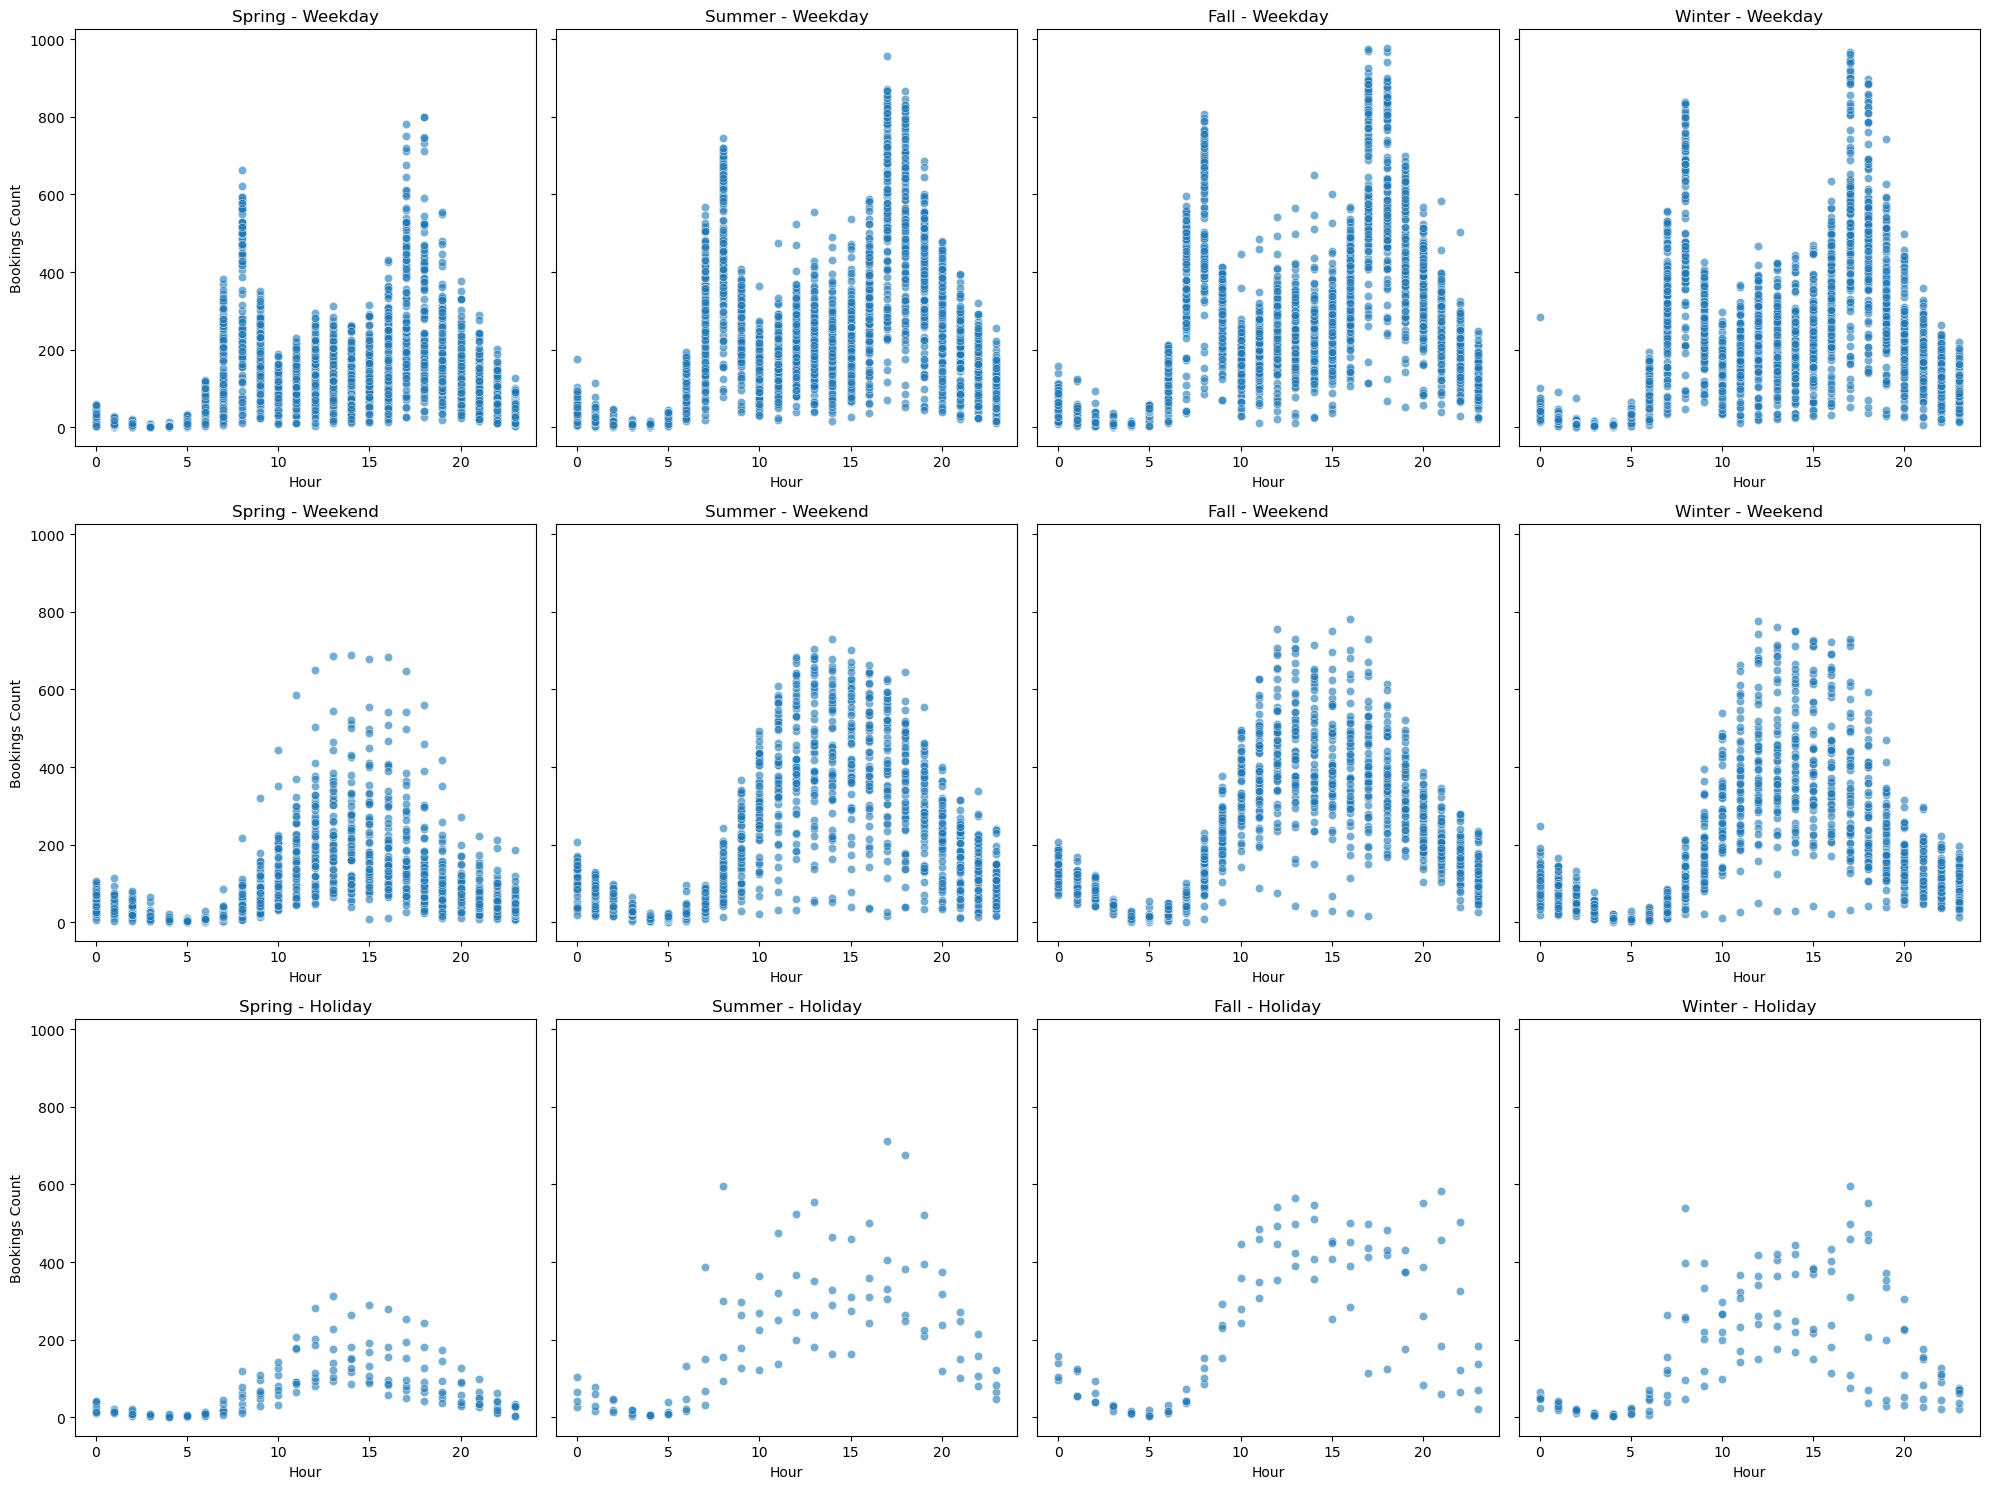

In [2]:
data['is_weekend'] = data['weekday'].apply(lambda x: 1 if x in [0, 6] else 0)

# Figure und Achsen vorbereiten
fig, axes = plt.subplots(3, 4, figsize=(20, 15), sharey=True)

# Überschriften für die Spalten
season_labels = ["Spring", "Summer", "Fall", "Winter"]

# Schleifen für Diagramme
for i, season in enumerate([1, 2, 3, 4]):
    # Nach Season filtern
    season_data = data[data['season'] == season]
    
    # Diagramm für Weekday (nur `is_weekend == 0`)
    weekday_data = season_data[season_data['is_weekend'] == 0]
    sns.scatterplot(ax=axes[0, i], data=weekday_data, x='hr', y='cnt', alpha=0.6)
    axes[0, i].set_title(f"{season_labels[i]} - Weekday")
    axes[0, i].set_xlabel("Hour")
    axes[0, i].set_ylabel("Bookings Count")
    
    # Diagramm für Weekend (nur `is_weekend == 1`)
    weekend_data = season_data[season_data['is_weekend'] == 1]
    sns.scatterplot(ax=axes[1, i], data=weekend_data, x='hr', y='cnt', alpha=0.6)
    axes[1, i].set_title(f"{season_labels[i]} - Weekend")
    axes[1, i].set_xlabel("Hour")
    axes[1, i].set_ylabel("Bookings Count")
    
    # Diagramm für Holiday (nur `holiday == 1`)
    holiday_data = season_data[season_data['holiday'] == 1]
    sns.scatterplot(ax=axes[2, i], data=holiday_data, x='hr', y='cnt', alpha=0.6)
    axes[2, i].set_title(f"{season_labels[i]} - Holiday")
    axes[2, i].set_xlabel("Hour")
    axes[2, i].set_ylabel("Bookings Count")

# Layout anpassen und anzeigen
plt.tight_layout()
plt.show()

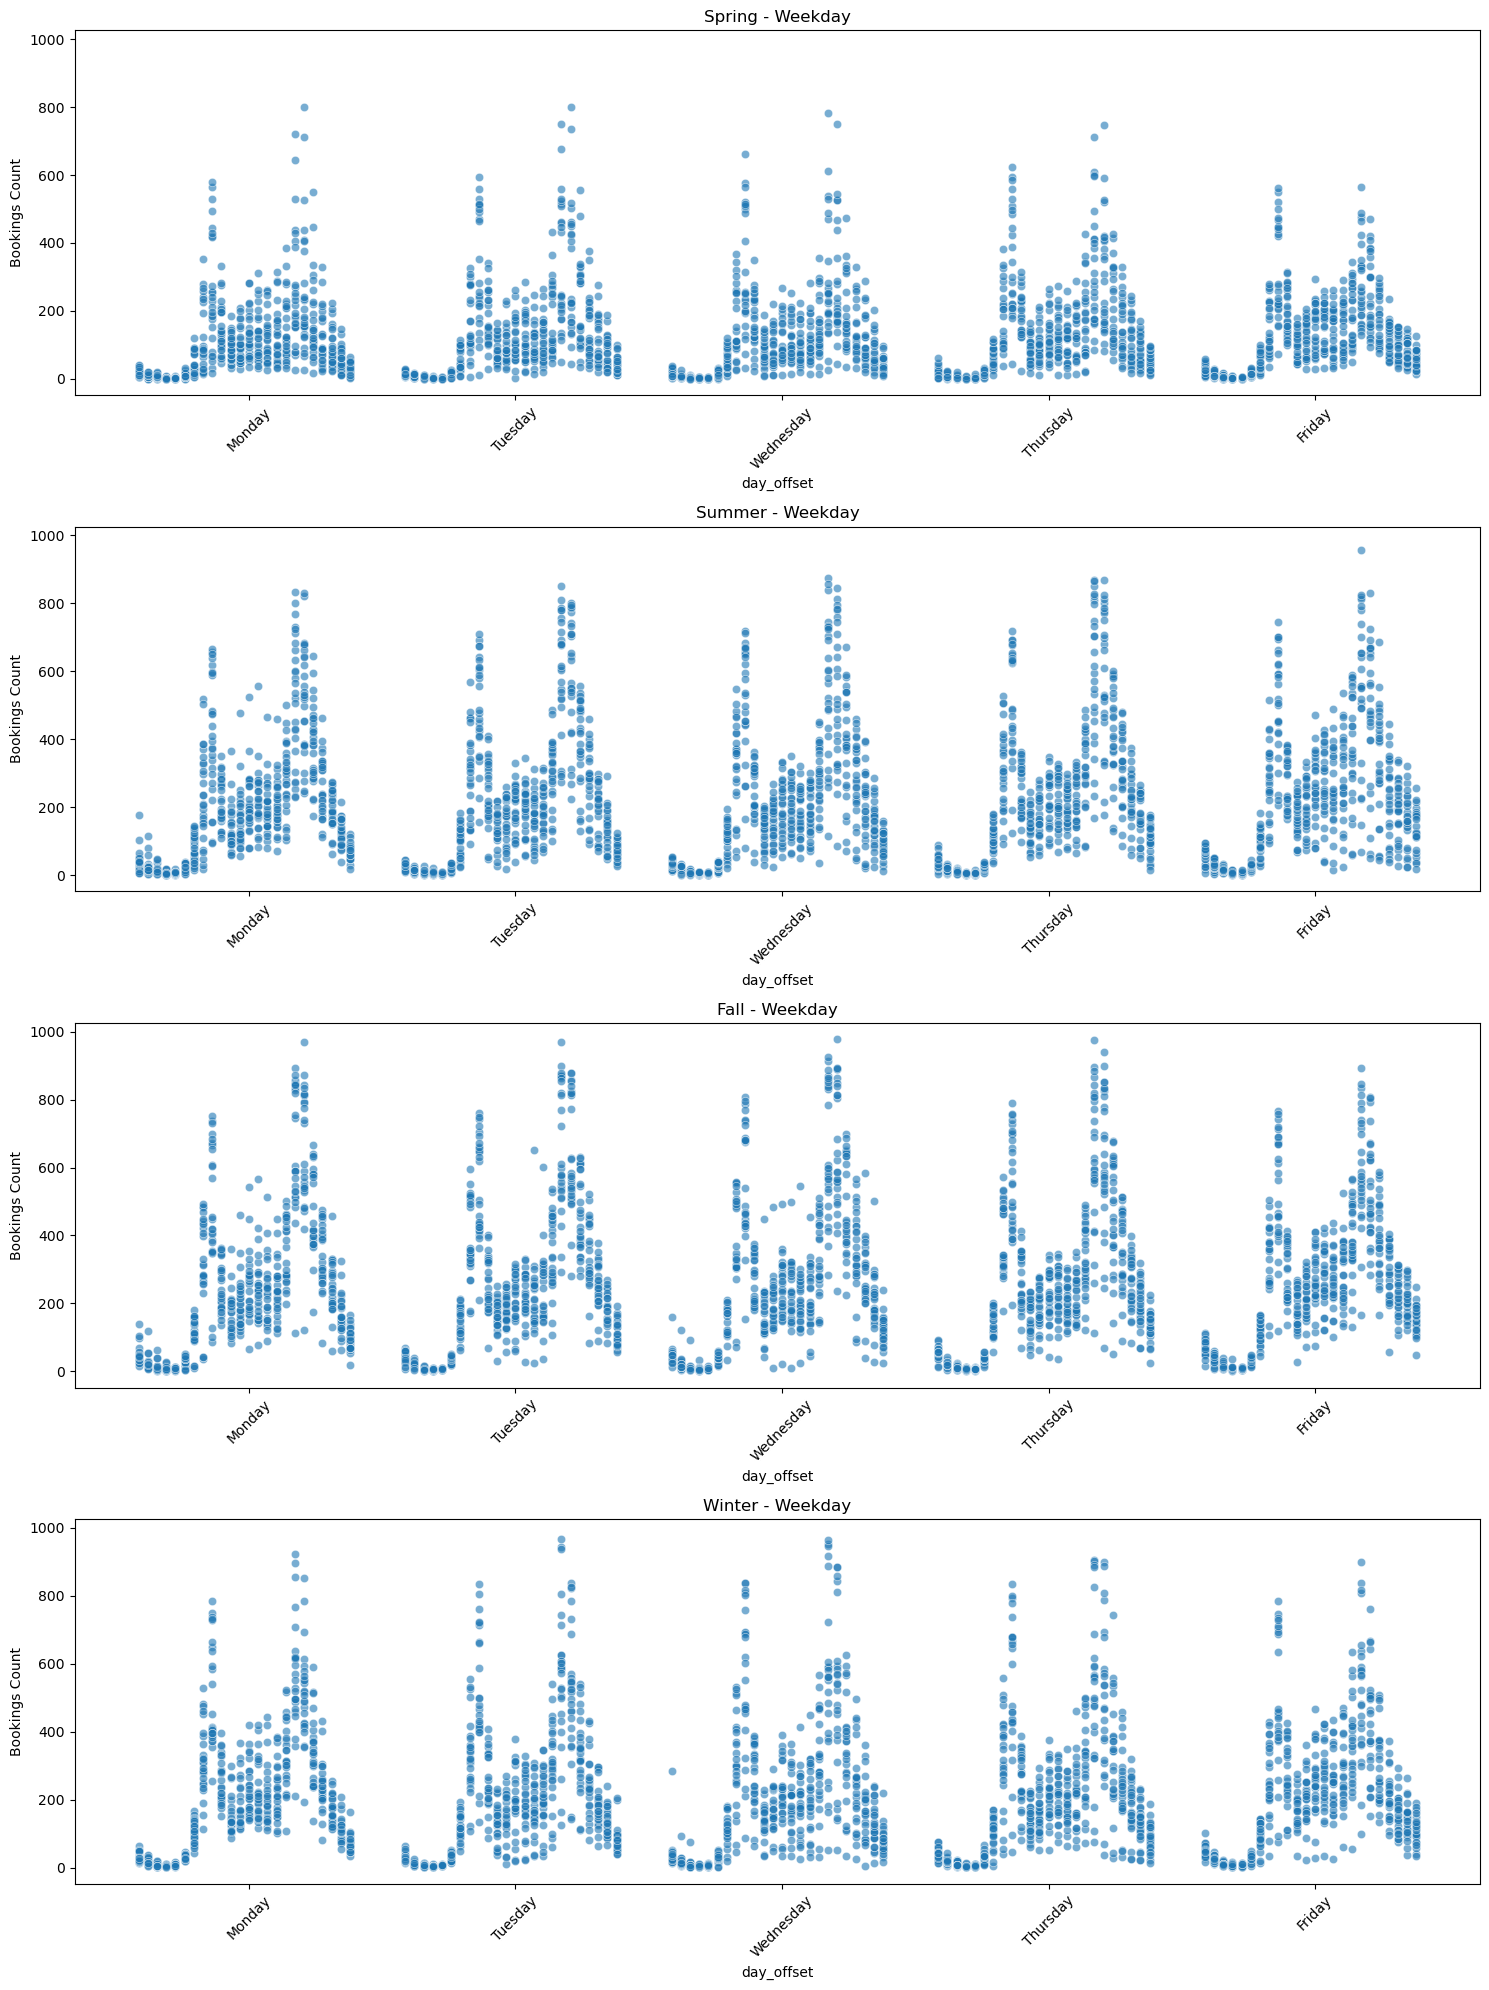

In [3]:
# Kombinierte Spalte für Tag und Uhrzeit mit Abstand
gap = 5  # Abstand zwischen den Tagen
data['day_offset'] = data['weekday'] * (24 + gap) + data['hr']

# Überschriften für die Saisons
season_labels = ["Spring", "Summer", "Fall", "Winter"]

# Wochentagsnamen (ohne Saturday und Sunday)
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekday_indices = [1, 2, 3, 4, 5]  # Indizes der Tage, die bleiben

# Subplots vorbereiten
fig, axes = plt.subplots(4, 1, figsize=(15, 20), sharex=False, sharey=True)  # Nur 4 Zeilen für Weekday

# Schleifen für die Seasons
for season_idx, season in enumerate([1, 2, 3, 4]):
    # Nach Season filtern
    season_data = data[data['season'] == season]

    # Daten für Weekday filtern (nur `is_weekend == 0`)
    weekday_data = season_data[season_data['is_weekend'] == 0]

    # Scatterplot erstellen
    sns.scatterplot(ax=axes[season_idx], data=weekday_data, x='day_offset', y='cnt', alpha=0.6)
    axes[season_idx].set_title(f"{season_labels[season_idx]} - Weekday")
    axes[season_idx].set_ylabel("Bookings Count")

    # X-Achse beschriften: Nur für Monday bis Friday
    xticks_positions = [(i * (24 + gap) + 12) for i in weekday_indices]  # Mitte der Tage
    axes[season_idx].set_xticks(xticks_positions)
    axes[season_idx].set_xticklabels(weekday_labels)
    axes[season_idx].tick_params(axis='x', rotation=45)  # Beschriftungen leicht schräg

# Layout anpassen und anzeigen
plt.tight_layout()
plt.show()

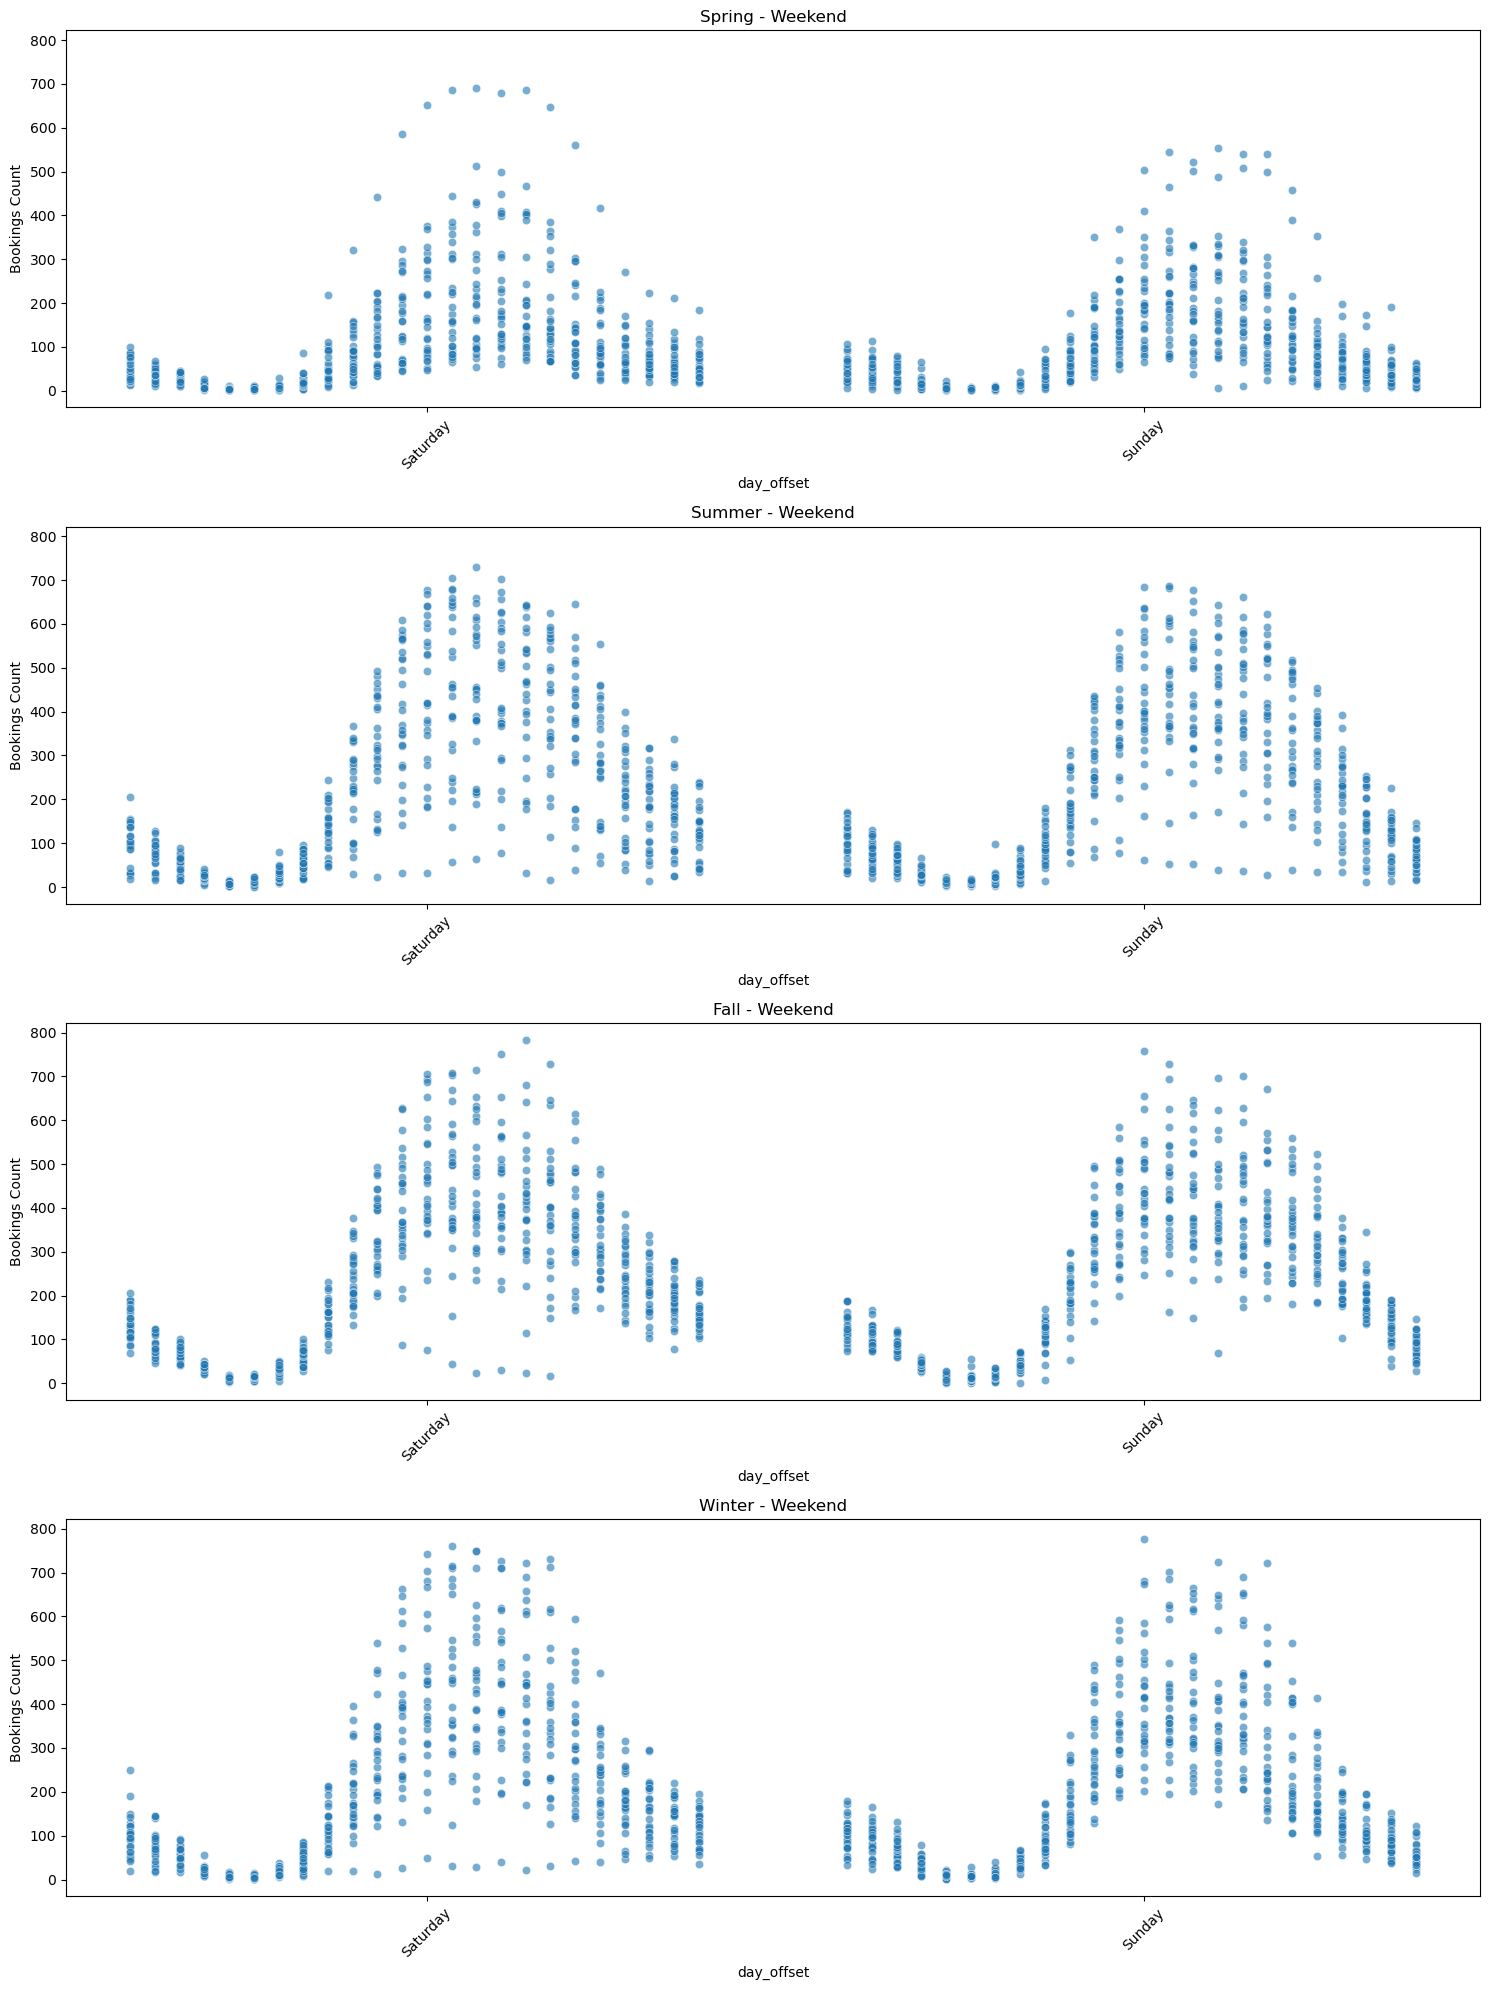

In [4]:
# Datenaufbereitung
# Mapping für die Wochentage: Wochentage (1-5) und Wochenende (0, 6)
data['is_weekend'] = data['weekday'].apply(lambda x: 1 if x in [0, 6] else 0)

# Kombinierte Spalte für Tag und Uhrzeit mit Abstand und getauschter Reihenfolge
gap = 5  # Abstand zwischen Saturday und Sunday
data['day_offset'] = data['weekday'].replace({0: 1, 6: 0}) * (24 + gap) + data['hr']
# Saturday (6) ist jetzt links (0), Sunday (0) ist jetzt rechts (1)

# Überschriften für die Saisons
season_labels = ["Spring", "Summer", "Fall", "Winter"]

# Wochenendnamen (getauschte Reihenfolge)
weekend_labels = ['Saturday', 'Sunday']

# Subplots vorbereiten
fig, axes = plt.subplots(4, 1, figsize=(15, 20), sharex=False, sharey=True)  # 4 Zeilen für Wochenende

# Schleifen für die Seasons
for season_idx, season in enumerate([1, 2, 3, 4]):
    # Nach Season filtern
    season_data = data[data['season'] == season]

    # Daten für Wochenende filtern (nur `weekday == 0` oder `weekday == 6`)
    weekend_data = season_data[season_data['weekday'].isin([0, 6])]

    # Scatterplot erstellen
    sns.scatterplot(ax=axes[season_idx], data=weekend_data, x='day_offset', y='cnt', alpha=0.6)
    axes[season_idx].set_title(f"{season_labels[season_idx]} - Weekend")
    axes[season_idx].set_ylabel("Bookings Count")

    # X-Achse beschriften: Saturday und Sunday
    xticks_positions = [12, 36 + gap]  # Mitte der Tage Saturday (6) und Sunday (0)
    axes[season_idx].set_xticks(xticks_positions)
    axes[season_idx].set_xticklabels(weekend_labels)
    axes[season_idx].tick_params(axis='x', rotation=45)

# Layout anpassen und anzeigen
plt.tight_layout()
plt.show()

C:\Users\felip\AppData\Local\Temp\ipykernel_26584\1195377030.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holiday_data['day_offset'] = offset + holiday_data['weekday'] * (24 + gap) + holiday_data['hr']


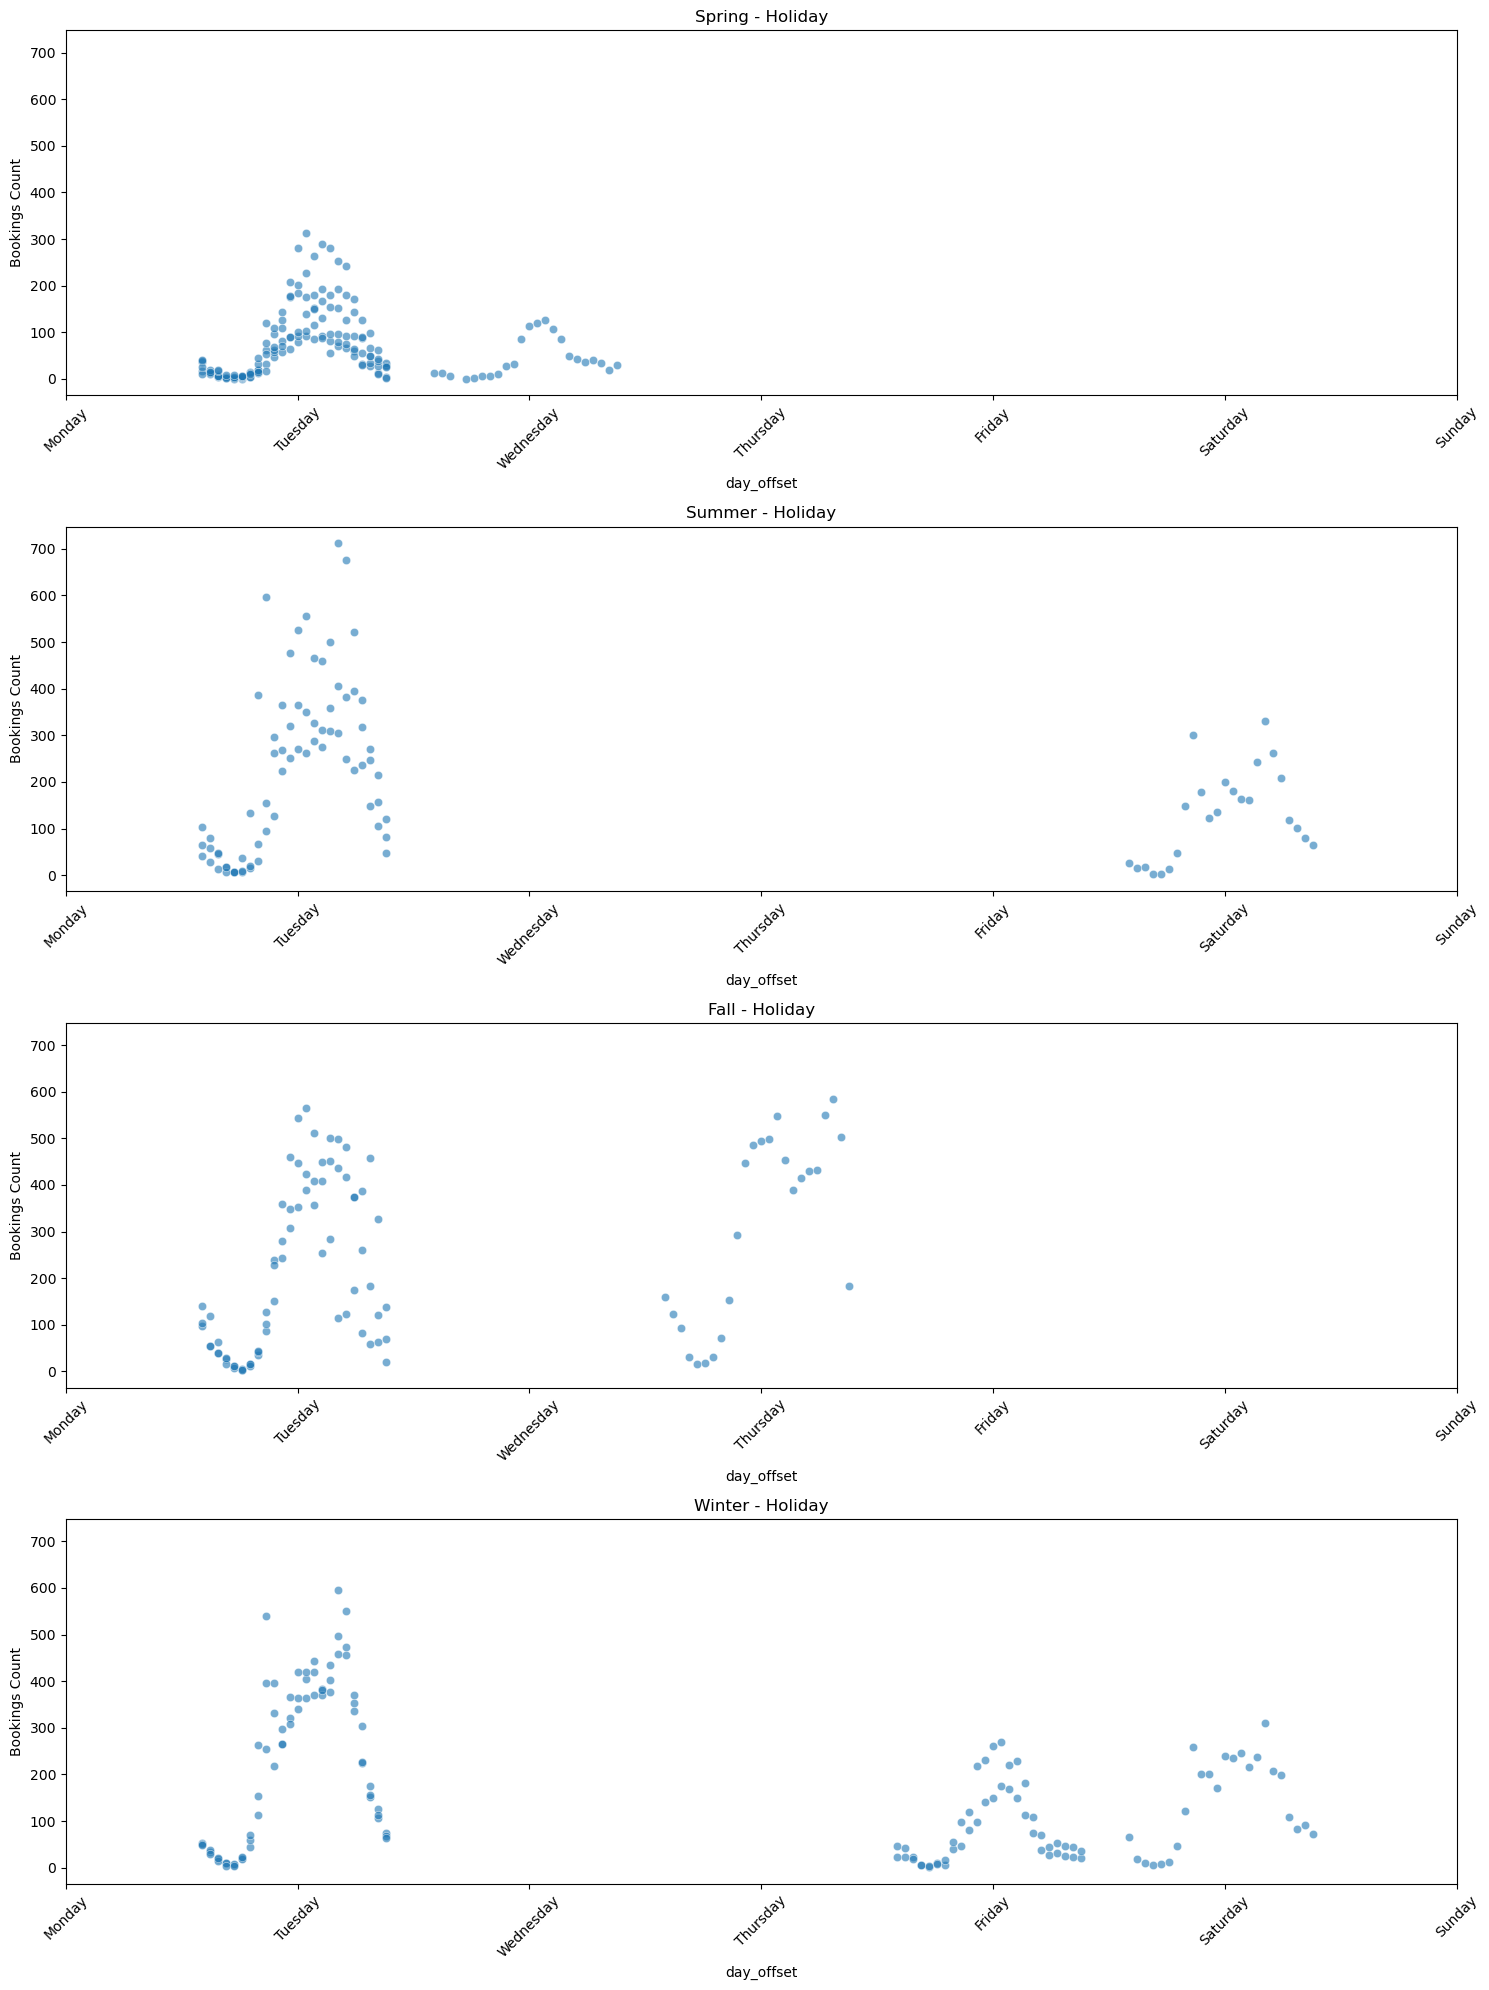

In [5]:
# Datenaufbereitung
# Nur Feiertage filtern
holiday_data = data[data['holiday'] == 1]

# Kombinierte Spalte für Tag und Uhrzeit mit größerer Einrückung
offset = 50  # Deutliche Einrückung für den Start
gap = 5  # Optionaler Abstand zwischen Tagen
holiday_data['day_offset'] = offset + holiday_data['weekday'] * (24 + gap) + holiday_data['hr']
# Die Einrückung verschiebt den Start der X-Achse weiter nach rechts

# Überschriften für die Saisons
season_labels = ["Spring", "Summer", "Fall", "Winter"]

# Wochentagsnamen (Monday bis Sunday)
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Subplots vorbereiten
fig, axes = plt.subplots(4, 1, figsize=(15, 20), sharex=False, sharey=True)  # 4 Zeilen für Holiday

# Schleifen für die Seasons
for season_idx, season in enumerate([1, 2, 3, 4]):
    # Nach Season filtern
    season_data = holiday_data[holiday_data['season'] == season]

    # Scatterplot erstellen
    sns.scatterplot(ax=axes[season_idx], data=season_data, x='day_offset', y='cnt', alpha=0.6)
    axes[season_idx].set_title(f"{season_labels[season_idx]} - Holiday")
    axes[season_idx].set_ylabel("Bookings Count")

    # X-Achse beschriften: Alle Wochentage mit großer Einrückung
    xticks_positions = [offset + (i * (24 + gap) + 12) for i in range(7)]  # Mitte der Tage mit größerer Einrückung
    axes[season_idx].set_xticks(xticks_positions)
    axes[season_idx].set_xticklabels(weekday_labels)
    axes[season_idx].tick_params(axis='x', rotation=45)

# Layout anpassen und anzeigen
plt.tight_layout()
plt.show()

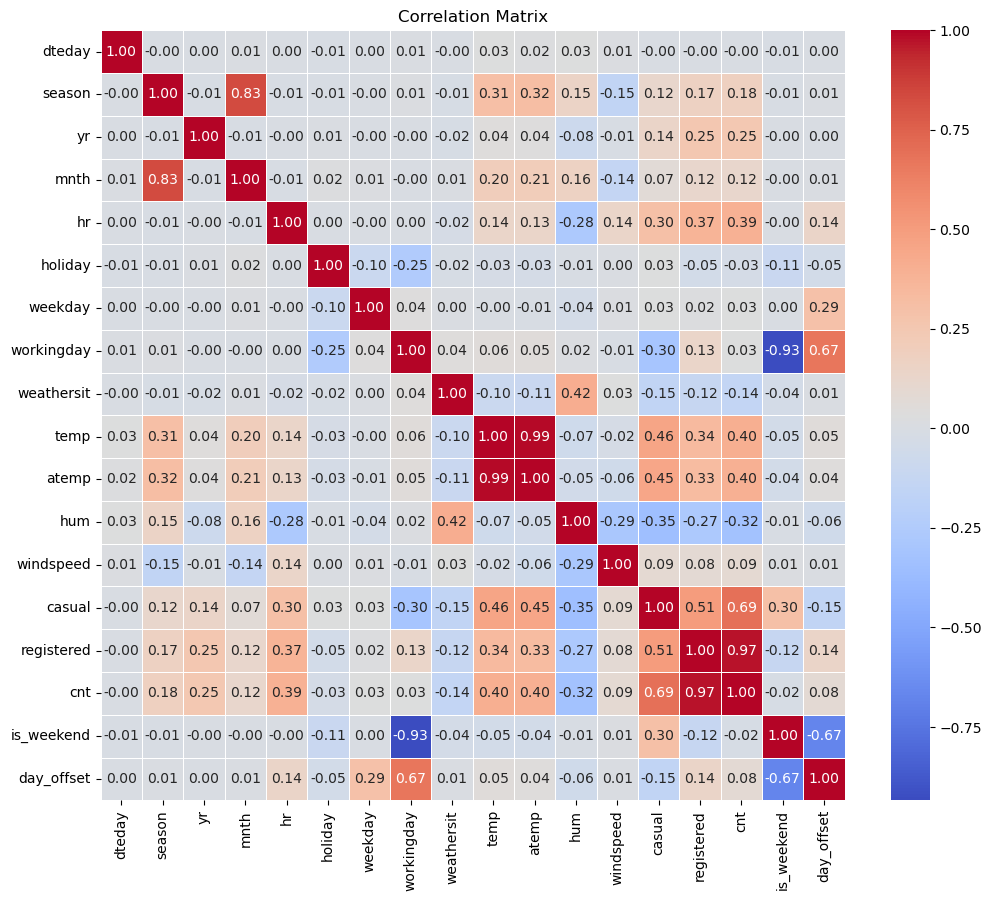

In [6]:
import seaborn as sns
corr_matrix = data.corr()

# Plot the Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [7]:
dataset = data.drop(['dteday', 'mnth', 'yr', 'holiday', 'weathersit', 'hum', 'windspeed', 'casual', 'registered'], axis=1)

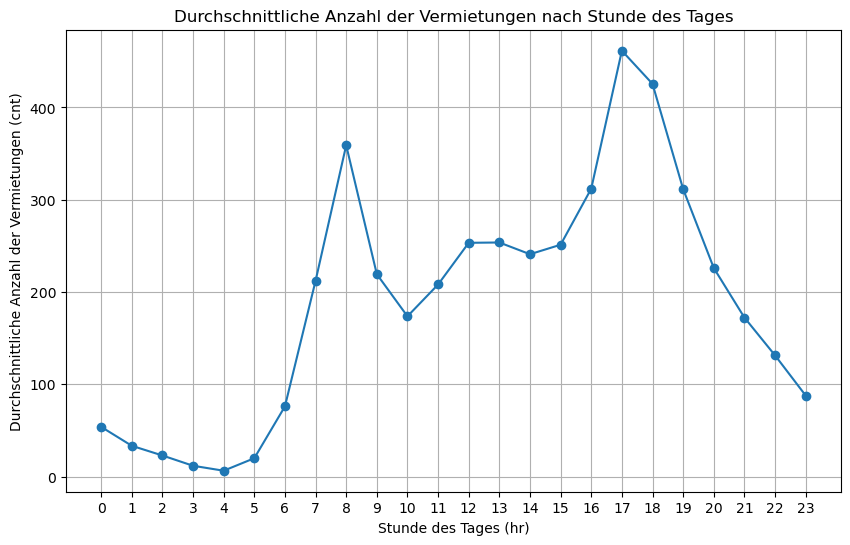

In [8]:
# Annahme: Der Datensatz ist bereits in 'dataset' geladen und enthält die Spalten 'hr' und 'cnt'

# Mittelwert der Vermietungen pro Stunde berechnen
hourly_counts = dataset.groupby('hr')['cnt'].mean().reset_index()

# Diagramm erstellen
plt.figure(figsize=(10, 6))
plt.plot(hourly_counts['hr'], hourly_counts['cnt'], marker='o')
plt.title('Durchschnittliche Anzahl der Vermietungen nach Stunde des Tages')
plt.xlabel('Stunde des Tages (hr)')
plt.ylabel('Durchschnittliche Anzahl der Vermietungen (cnt)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

# Annahme: 'dataset' ist bereits definiert und importiert
dataset_np = data.to_numpy()

X = dataset_np[:, :6]
Y = dataset_np[:, 6]

XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2, random_state=22)

# Erweiterte Parameter für die Grid-Suche
parameters = {
    'n_estimators': [100, 200],
    'max_depth': [4, 8, 12, 16],
    'min_samples_split': [2, 5]
}

rgr = RandomForestRegressor(random_state=3)
gs = GridSearchCV(rgr, parameters)
gs.fit(XTrain, YTrain)

# Ausgabe der besten Parameter und des besten Scores
print("Beste Parameter:", gs.best_params_)
print("Bestes Score:", gs.best_score_)


Beste Parameter: {'max_depth': 16, 'min_samples_split': 2, 'n_estimators': 100}
Bestes Score: 0.8720576350120662


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.base import BaseEstimator, RegressorMixin

dataset_np = dataset.to_numpy()

X = dataset_np[:, :6]
Y = dataset_np[:, 6]

XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2, random_state=22)

class PolynomialRegression(BaseEstimator, RegressorMixin):
    def __init__(self, degree=1):
        self.degree = degree
        self.linear_model = LinearRegression()
        self.poly_features = None

    def fit(self, X, y):
        self.poly_features = PolynomialFeatures(degree=self.degree)
        X_poly = self.poly_features.fit_transform(X)
        self.linear_model.fit(X_poly, y)
        return self

    def predict(self, X):
        X_poly = self.poly_features.transform(X)
        return self.linear_model.predict(X_poly)

parameters = {
    'degree': [5, 6, 7, 8]  # Grad des Polynoms
}

poly_reg = PolynomialRegression()
gs = GridSearchCV(poly_reg, parameters)
gs.fit(XTrain, YTrain)

print("Beste Parameter:", gs.best_params_)
print("Bestes Score:", gs.best_score_)


Beste Parameter: {'degree': 6}
Bestes Score: 0.5982824640537455


In [11]:
parameters = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 für Manhattan-Distanz, p=2 für euklidische Distanz
}

knn = KNeighborsRegressor()
gs = GridSearchCV(knn, parameters)
gs.fit(XTrain, YTrain)

# Ausgabe der besten Parameter und des besten Scores
print("Beste Parameter:", gs.best_params_)
print("Bestes Score:", gs.best_score_)


Beste Parameter: {'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
Bestes Score: 0.7558399582132036
